# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fitria Anggraini
- Email: ftranggra23@gmail.com
- Id Dicoding: ftriaanggra23

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

In [2]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
df_edu = pd.read_csv(url, sep=';')

## Data Understanding

In [3]:
df_edu.head().T

,0,1,2,3,4
Marital_status,1,1,1,1,2
Application_mode,17,15,1,17,39
Application_order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime_evening_attendance,1,1,1,1,0
Previous_qualification,1,1,1,1,1
Previous_qualification_grade,122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mothers_qualification,19,1,37,38,37
Fathers_qualification,12,3,37,37,38


In [4]:
print(df_edu['Status'].unique())

['Dropout' 'Graduate' 'Enrolled']


In [5]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
df_edu.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [7]:
df_edu.duplicated().sum()

np.int64(0)

### Statistik Deskriptif

In [8]:
df_edu.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [9]:
df_pend = df_edu.copy()

### Distribusi Target (Status)

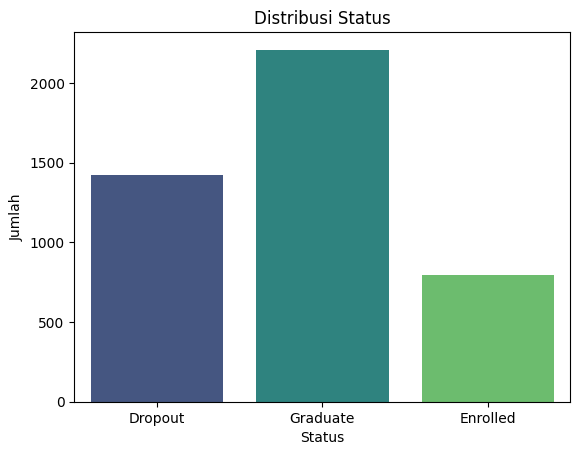

In [10]:
sns.countplot(x='Status', data=df_pend, palette='viridis')
plt.title('Distribusi Status')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

**Insight**

Dari grafik ini, dapat diperoleh beberapa insight penting. Pertama, sebagian besar mahasiswa berada pada kategori Graduate, yang menunjukkan bahwa mayoritas berhasil menyelesaikan studinya. Kedua, jumlah mahasiswa yang Dropout juga cukup signifikan, menunjukkan adanya tantangan dalam mempertahankan mahasiswa hingga lulus. Terakhir, jumlah mahasiswa yang saat ini masih Enrolled relatif lebih sedikit dibandingkan dua kategori lainnya, yang mungkin menunjukkan bahwa data ini lebih banyak merepresentasikan mahasiswa yang sudah menyelesaikan atau tidak menyelesaikan studinya dibandingkan yang masih aktif.

### Distribusi Fitur Numerik

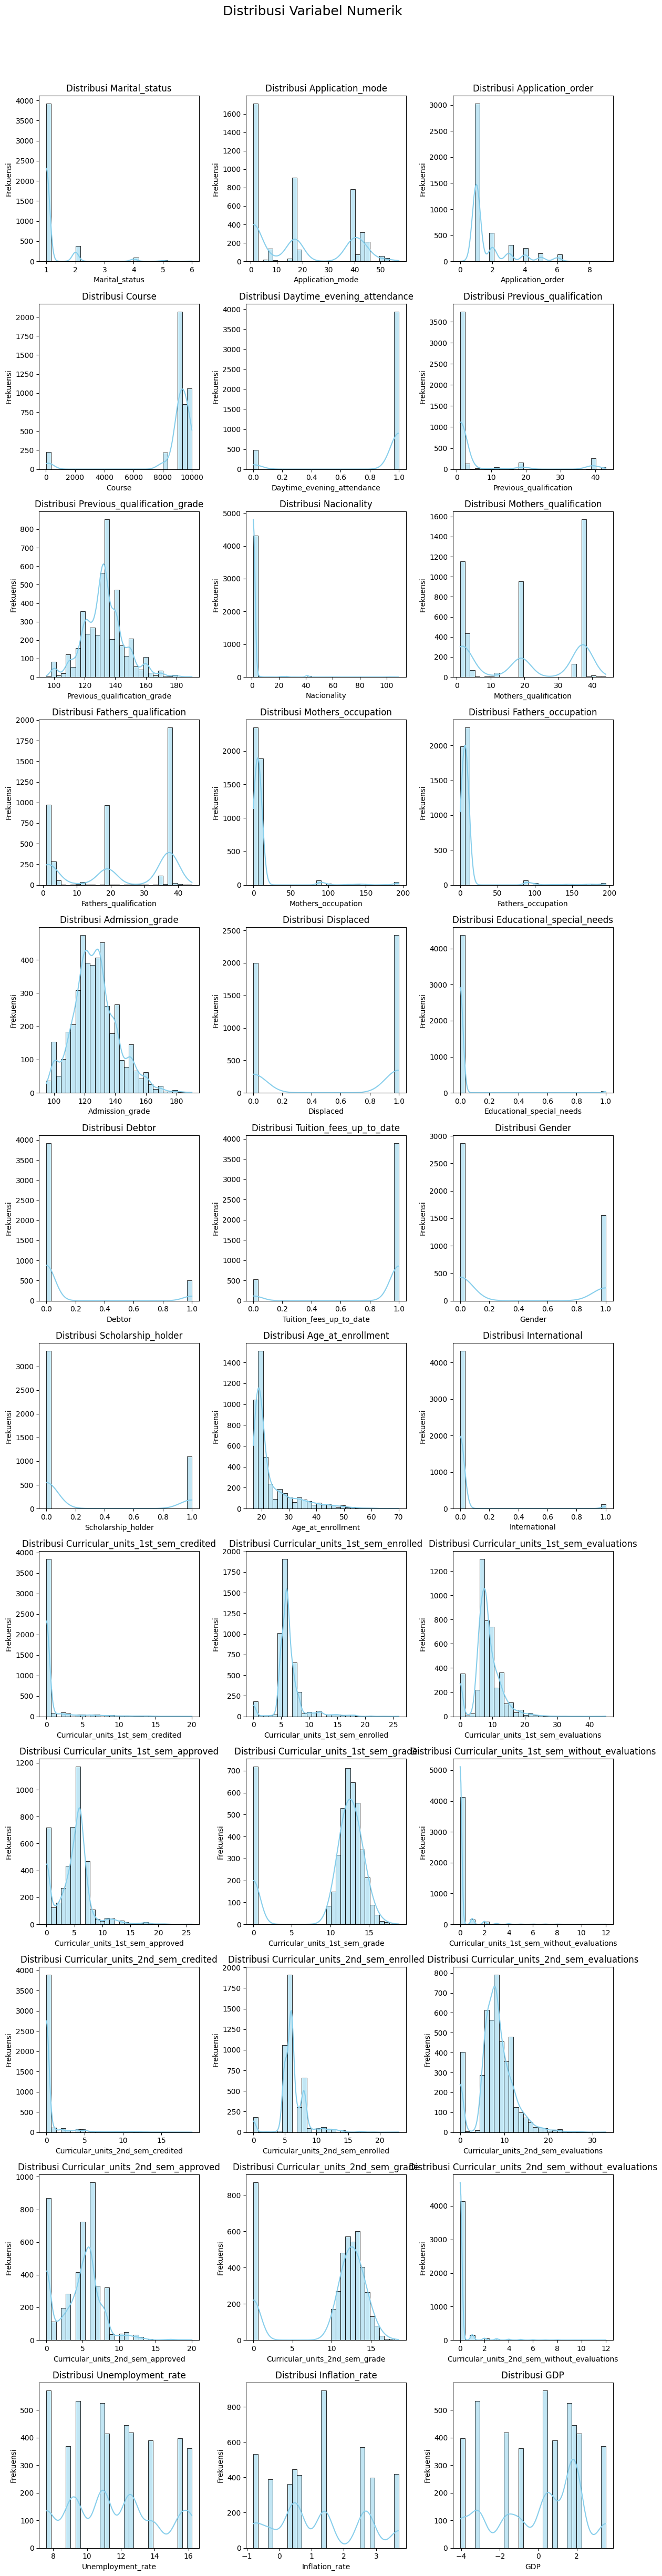

In [11]:
numerical_cols = df_pend.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(12, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_pend[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.suptitle('Distribusi Variabel Numerik', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### Deteksi Outlier

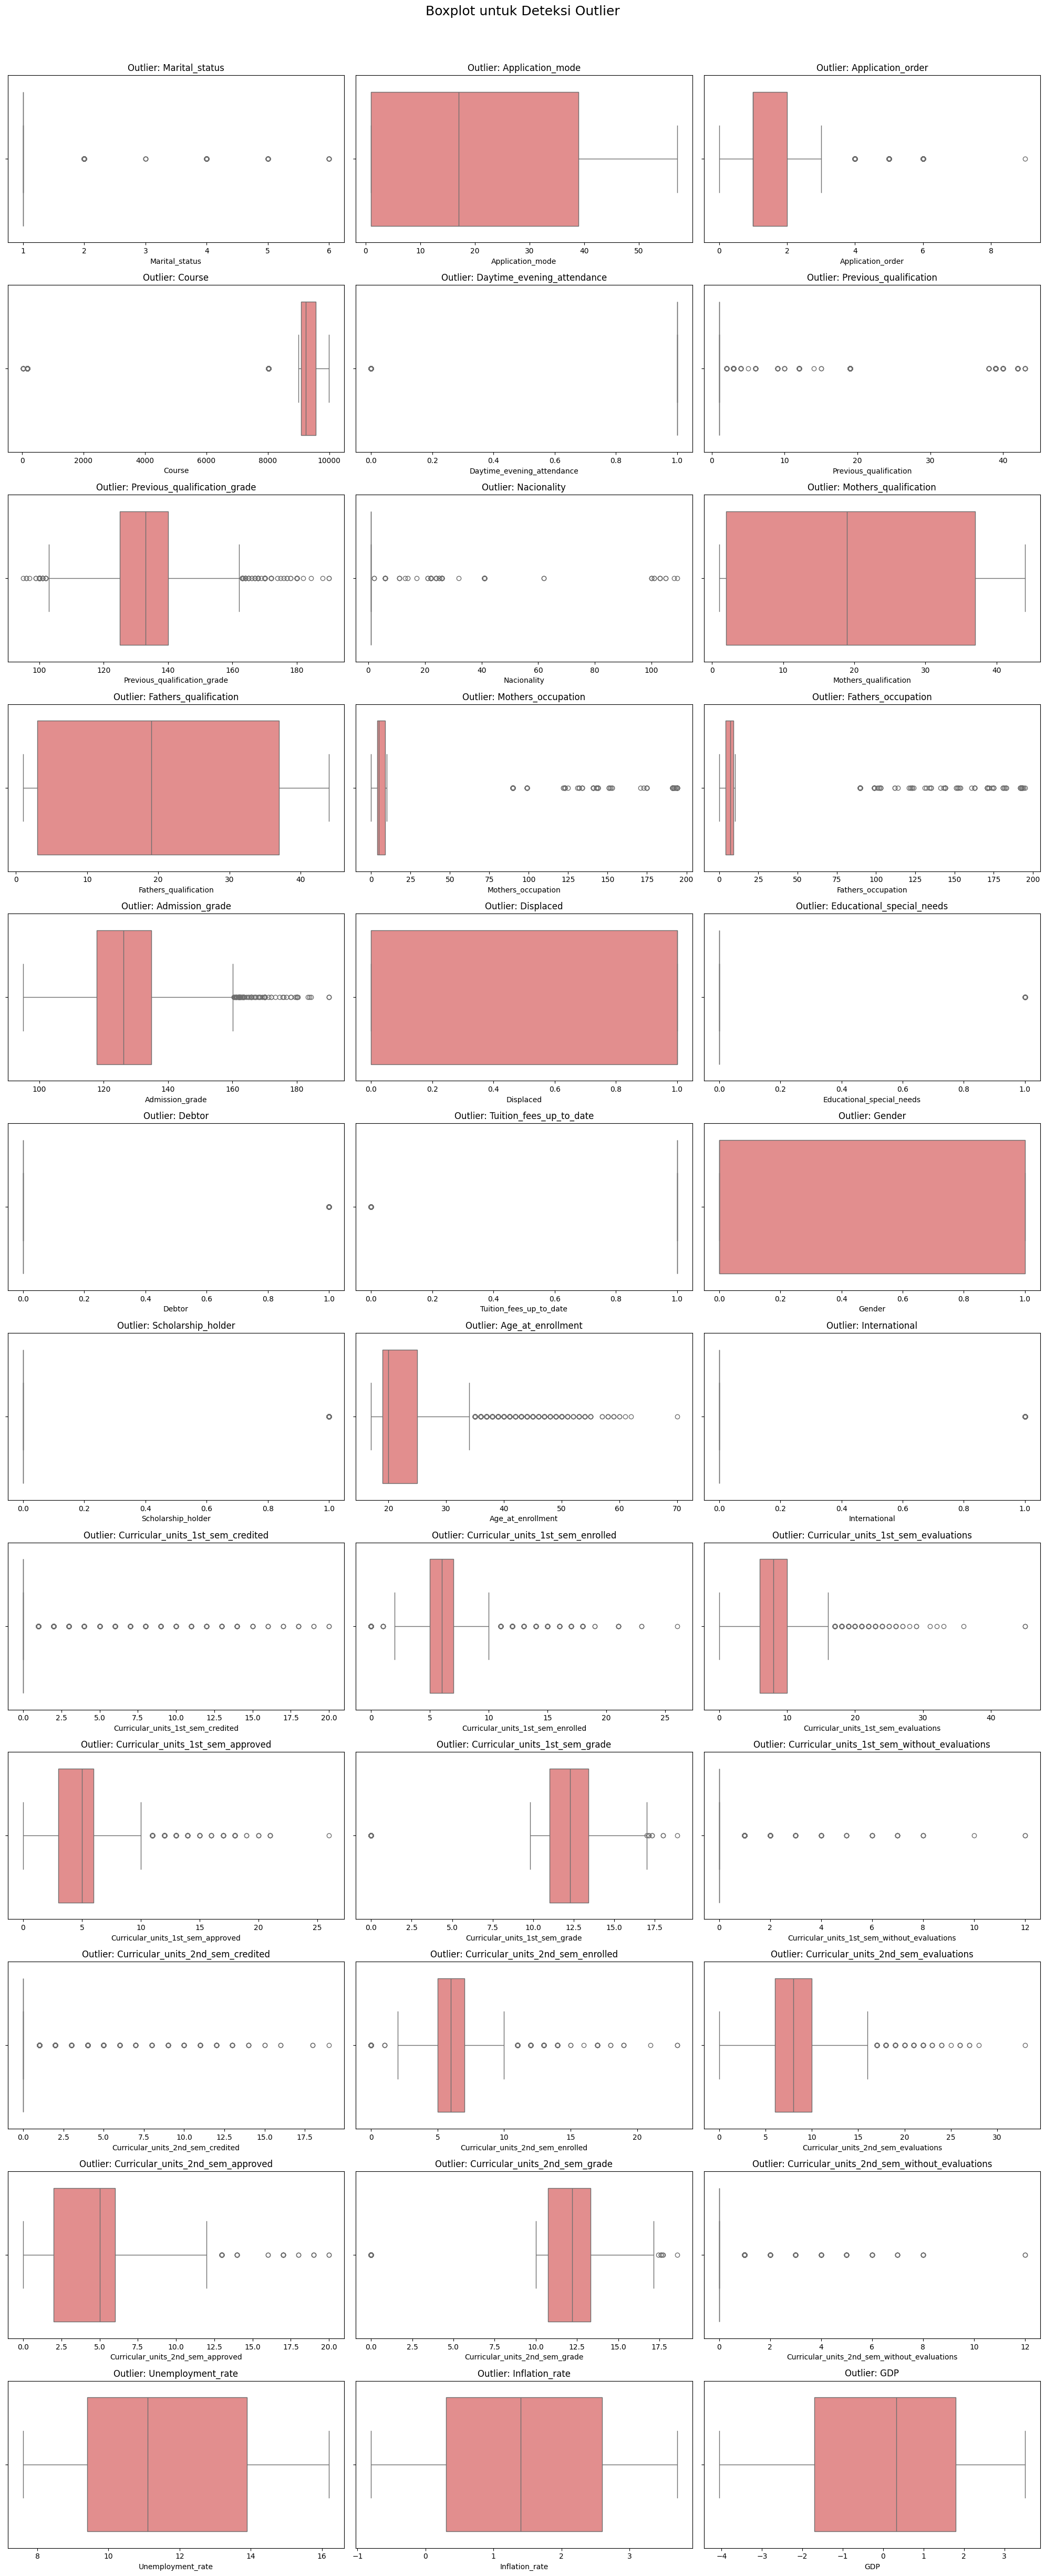

In [12]:
# Grid boxplot
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(20, n_rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df_pend[col], color='lightcoral')
    plt.title(f'Outlier: {col}')
    plt.tight_layout()
plt.suptitle('Boxplot untuk Deteksi Outlier', fontsize=18, y=1.02)
plt.show()

In [13]:
outlier_summary = []
def detect_outliers(df, col):
    """Detects outliers in a DataFrame column using the IQR method."""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    return outliers

# Loop setiap kolom numerik
for col in numerical_cols:
    outliers = detect_outliers(df_pend, col)
    n_outliers = len(outliers)
    perc_outliers = (n_outliers / len(df_pend)) * 100
    outlier_summary.append({
        'Fitur': col,
        'Jumlah Outlier': n_outliers,
        'Persentase Outlier (%)': round(perc_outliers, 2)
    })

# Ubah ke DataFrame
outlier_df = pd.DataFrame(outlier_summary)
outlier_df.sort_values(by='Persentase Outlier (%)', ascending=False).reset_index(drop=True)

,Fitur,Jumlah Outlier,Persentase Outlier (%)
0,Scholarship_holder,1099,24.84
1,Curricular_units_2nd_sem_grade,877,19.82
2,Curricular_units_1st_sem_grade,726,16.41
3,Previous_qualification,707,15.98
4,Curricular_units_1st_sem_credited,577,13.04
5,Application_order,541,12.23
6,Curricular_units_2nd_sem_credited,530,11.98
7,Tuition_fees_up_to_date,528,11.93
8,Marital_status,505,11.42
9,Debtor,503,11.37


**Insight**
- Sebagian besar outlier ditemukan pada beberapa fitur seperti nilai mata kuliah dan jumlah SKS, status beasiswa dan pernikahan. Outlier ini menunjukkan variasi yang signifikan dalam data dan bisa memengaruhi model.
- Fitur dengan outlier lebih dari 10% perlu diperhatikan karena bisa mengganggu hasil model. Namun, dalam proyek ini outlier tidak dihapus, melainkan ditangani dengan menggunakan RobustScaler, yang membantu mengurangi pengaruh nilai ekstrem tanpa menghilangkannya.
- Fitur dengan outlier di bawah 5% tetap dipertahankan karena mencerminkan variasi alami data yang penting untuk analisis.

### Heatmap Korelasi Antar Fitur

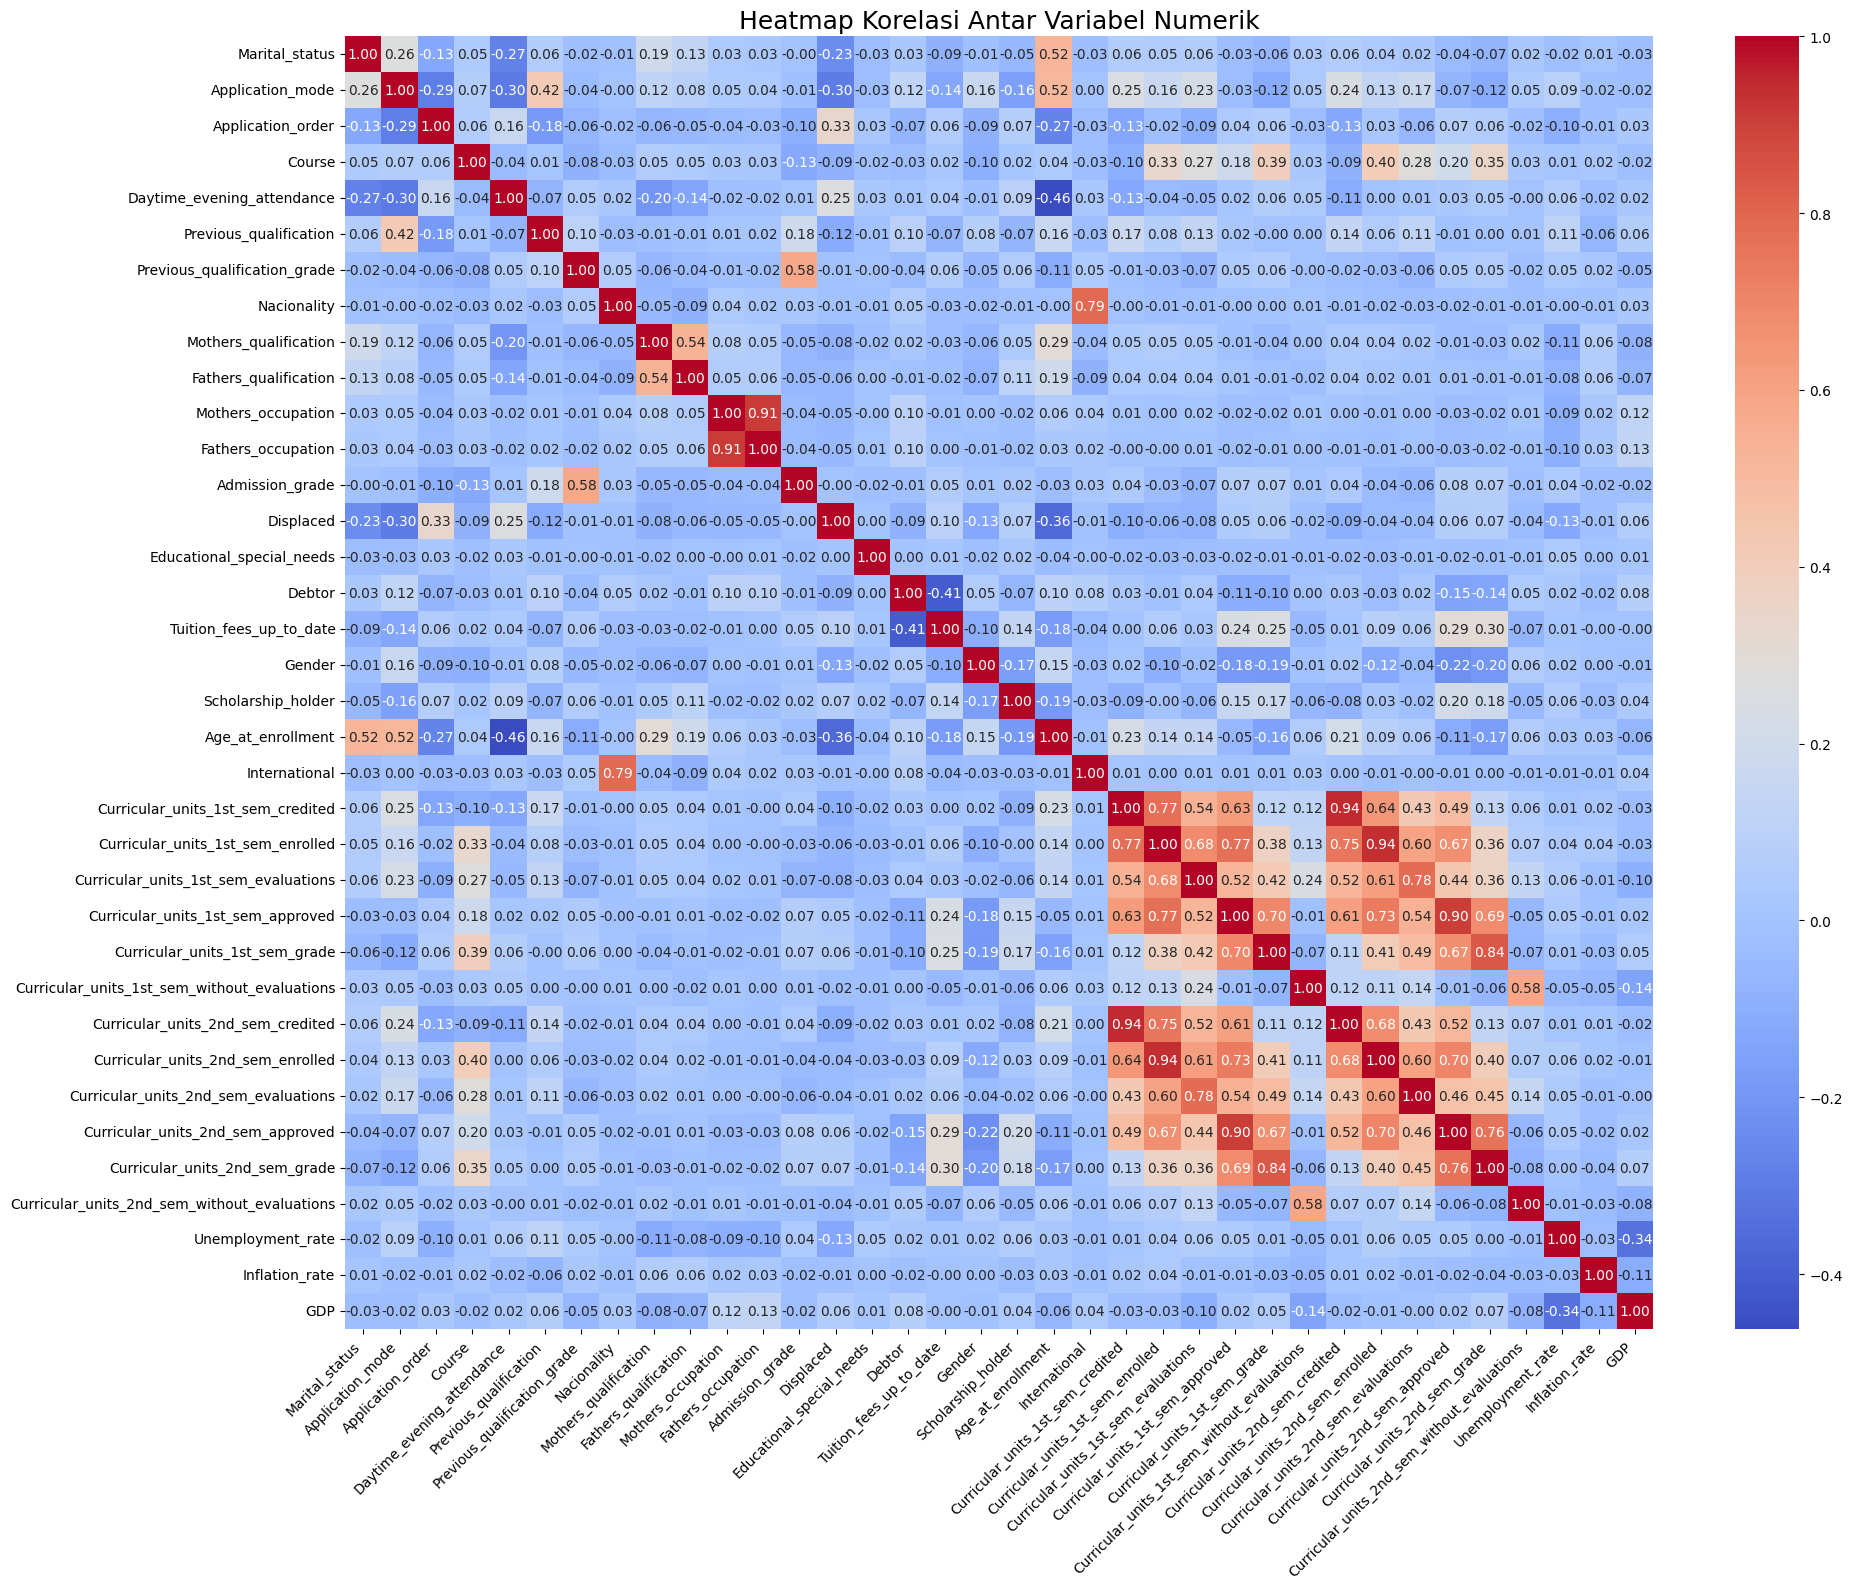

In [14]:
correlation_matrix = df_pend[numerical_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight**

Dari heatmap ini, terlihat bahwa terdapat korelasi yang sangat kuat antara variabel-variabel yang berkaitan dengan performa akademik, khususnya antar variabel semester 1 dan semester 2 seperti jumlah mata kuliah yang diambil, disetujui, dan nilai akhir, yang menunjukkan bahwa performa mahasiswa pada semester awal sangat berkaitan dengan performa di semester berikutnya. Selain itu, variabel nilai masuk atau admission grade juga menunjukkan korelasi positif yang cukup kuat terhadap performa akademik di semester 1, yang mengindikasikan bahwa mahasiswa dengan nilai masuk lebih tinggi cenderung memiliki nilai yang baik di perkuliahan awal. Sementara itu, usia saat masuk kuliah berkorelasi negatif terhadap nilai masuk dan performa akademik, yang berarti semakin tua usia mahasiswa saat mendaftar, cenderung performanya lebih rendah. Di sisi lain, variabel makro seperti GDP, tingkat pengangguran, dan inflasi memiliki korelasi yang sangat lemah terhadap variabel lainnya dalam dataset ini, sehingga pengaruhnya terhadap status atau performa mahasiswa cenderung tidak signifikan dalam konteks analisis ini.

### Kelompok Grafik Demografi dan Sosial Ekonomi

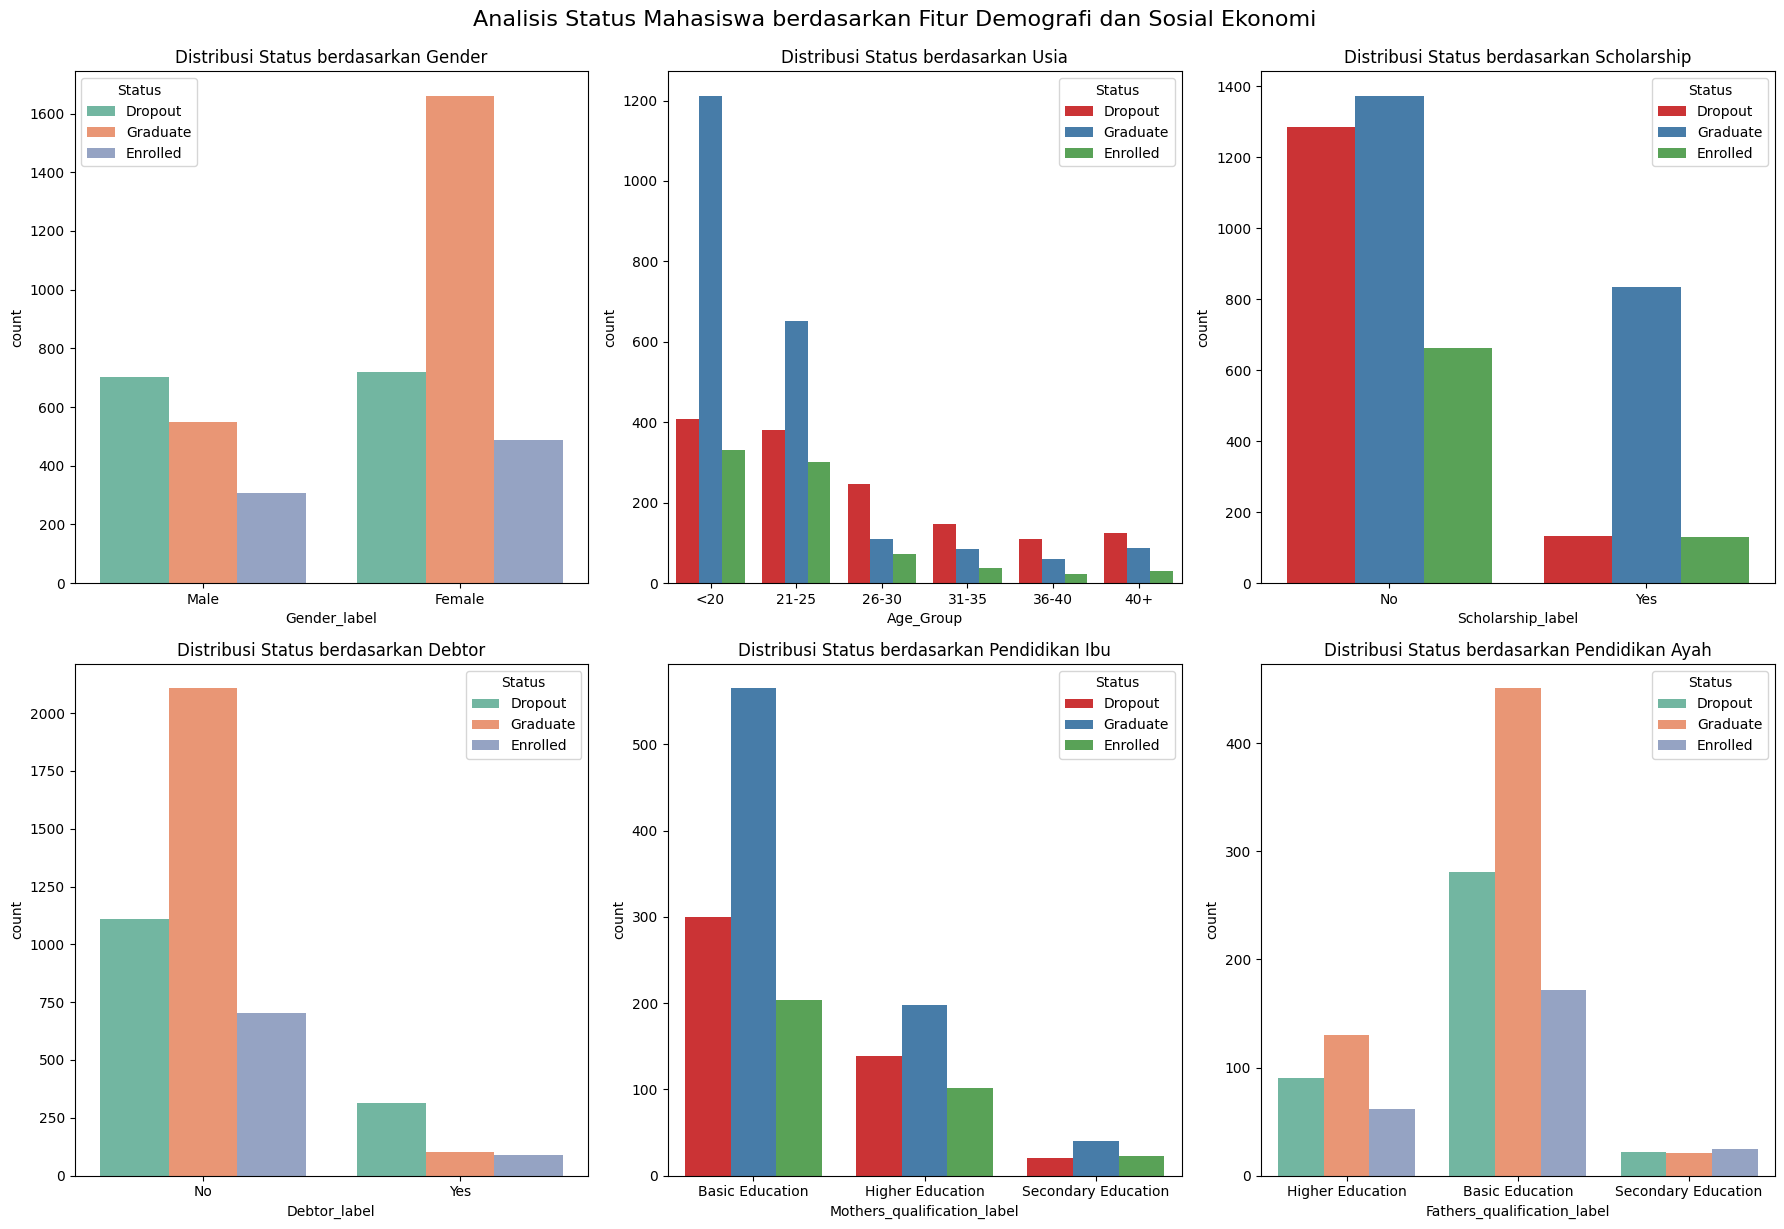

In [15]:
# Contoh bin dan label untuk usia
age_bins = [15, 20, 25, 30, 35, 40, 60]
age_labels = ['<20', '21-25', '26-30', '31-35', '36-40', '40+']

# Buat kolom Age_Group berdasarkan Age_at_enrollment
df_pend['Age_Group'] = pd.cut(df_pend['Age_at_enrollment'], bins=age_bins, labels=age_labels, right=False)

# Menambahkan label pada kolom kategorikal
df_pend['Gender_label'] = df_pend['Gender'].map({0: 'Female', 1: 'Male'})
df_pend['Scholarship_label'] = df_pend['Scholarship_holder'].map({0: 'No', 1: 'Yes'})
df_pend['Debtor_label'] = df_pend['Debtor'].map({0: 'No', 1: 'Yes'})
df_pend['Mothers_qualification_label'] = df_pend['Mothers_qualification'].map({
    1: 'Basic Education',
    2: 'Secondary Education',
    3: 'Higher Education'
})
df_pend['Fathers_qualification_label'] = df_pend['Fathers_qualification'].map({
    1: 'Basic Education',
    2: 'Secondary Education',
    3: 'Higher Education'
})

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Distribusi Status berdasarkan Gender
sns.countplot(ax=axes[0], data=df_pend, x='Gender_label', hue='Status', palette='Set2')
axes[0].set_title('Distribusi Status berdasarkan Gender')

# Distribusi Status berdasarkan Usia
sns.countplot(ax=axes[1], data=df_pend, x='Age_Group', hue='Status', palette='Set1')
axes[1].set_title('Distribusi Status berdasarkan Usia')

# Distribusi Status berdasarkan Scholarship
sns.countplot(ax=axes[2], data=df_pend, x='Scholarship_label', hue='Status', palette='Set1')
axes[2].set_title('Distribusi Status berdasarkan Scholarship')

# Distribusi Status berdasarkan Debtor
sns.countplot(ax=axes[3], data=df_pend, x='Debtor_label', hue='Status', palette='Set2')
axes[3].set_title('Distribusi Status berdasarkan Debtor')

# Distribusi Status berdasarkan Pendidikan Ibu
sns.countplot(ax=axes[4], data=df_pend, x='Mothers_qualification_label', hue='Status', palette='Set1')
axes[4].set_title('Distribusi Status berdasarkan Pendidikan Ibu')

# Distribusi Status berdasarkan Pendidikan Ayah
sns.countplot(ax=axes[5], data=df_pend, x='Fathers_qualification_label', hue='Status', palette='Set2')
axes[5].set_title('Distribusi Status berdasarkan Pendidikan Ayah')

plt.tight_layout()
plt.suptitle('Analisis Status Mahasiswa berdasarkan Fitur Demografi dan Sosial Ekonomi', fontsize=16, y=1.02)
plt.show()

**Insight**

Berdasarkan visualisasi, dapat disimpulkan bahwa sebagian besar mahasiswa yang berhasil lulus berasal dari kelompok perempuan, berusia di bawah 20 tahun, tidak menerima beasiswa, dan bukan merupakan debitur. Mahasiswa dengan latar belakang orang tua yang berpendidikan dasar juga menunjukkan jumlah kelulusan yang cukup tinggi dibandingkan dengan tingkat pendidikan yang lebih tinggi, baik untuk ibu maupun ayah. Hal ini menunjukkan bahwa faktor usia muda dan tidak memiliki tanggungan finansial seperti utang tampaknya berkontribusi terhadap keberhasilan studi. Selain itu, beasiswa belum tentu menjadi penentu utama keberhasilan, karena banyak mahasiswa tanpa beasiswa yang justru berhasil lulus. Insight ini dapat digunakan untuk merancang intervensi kebijakan atau dukungan akademik yang lebih tepat sasaran.

### Kelompok Grafik Semester (nilai, jumlah, persetujuan, tanpa evaluasi)

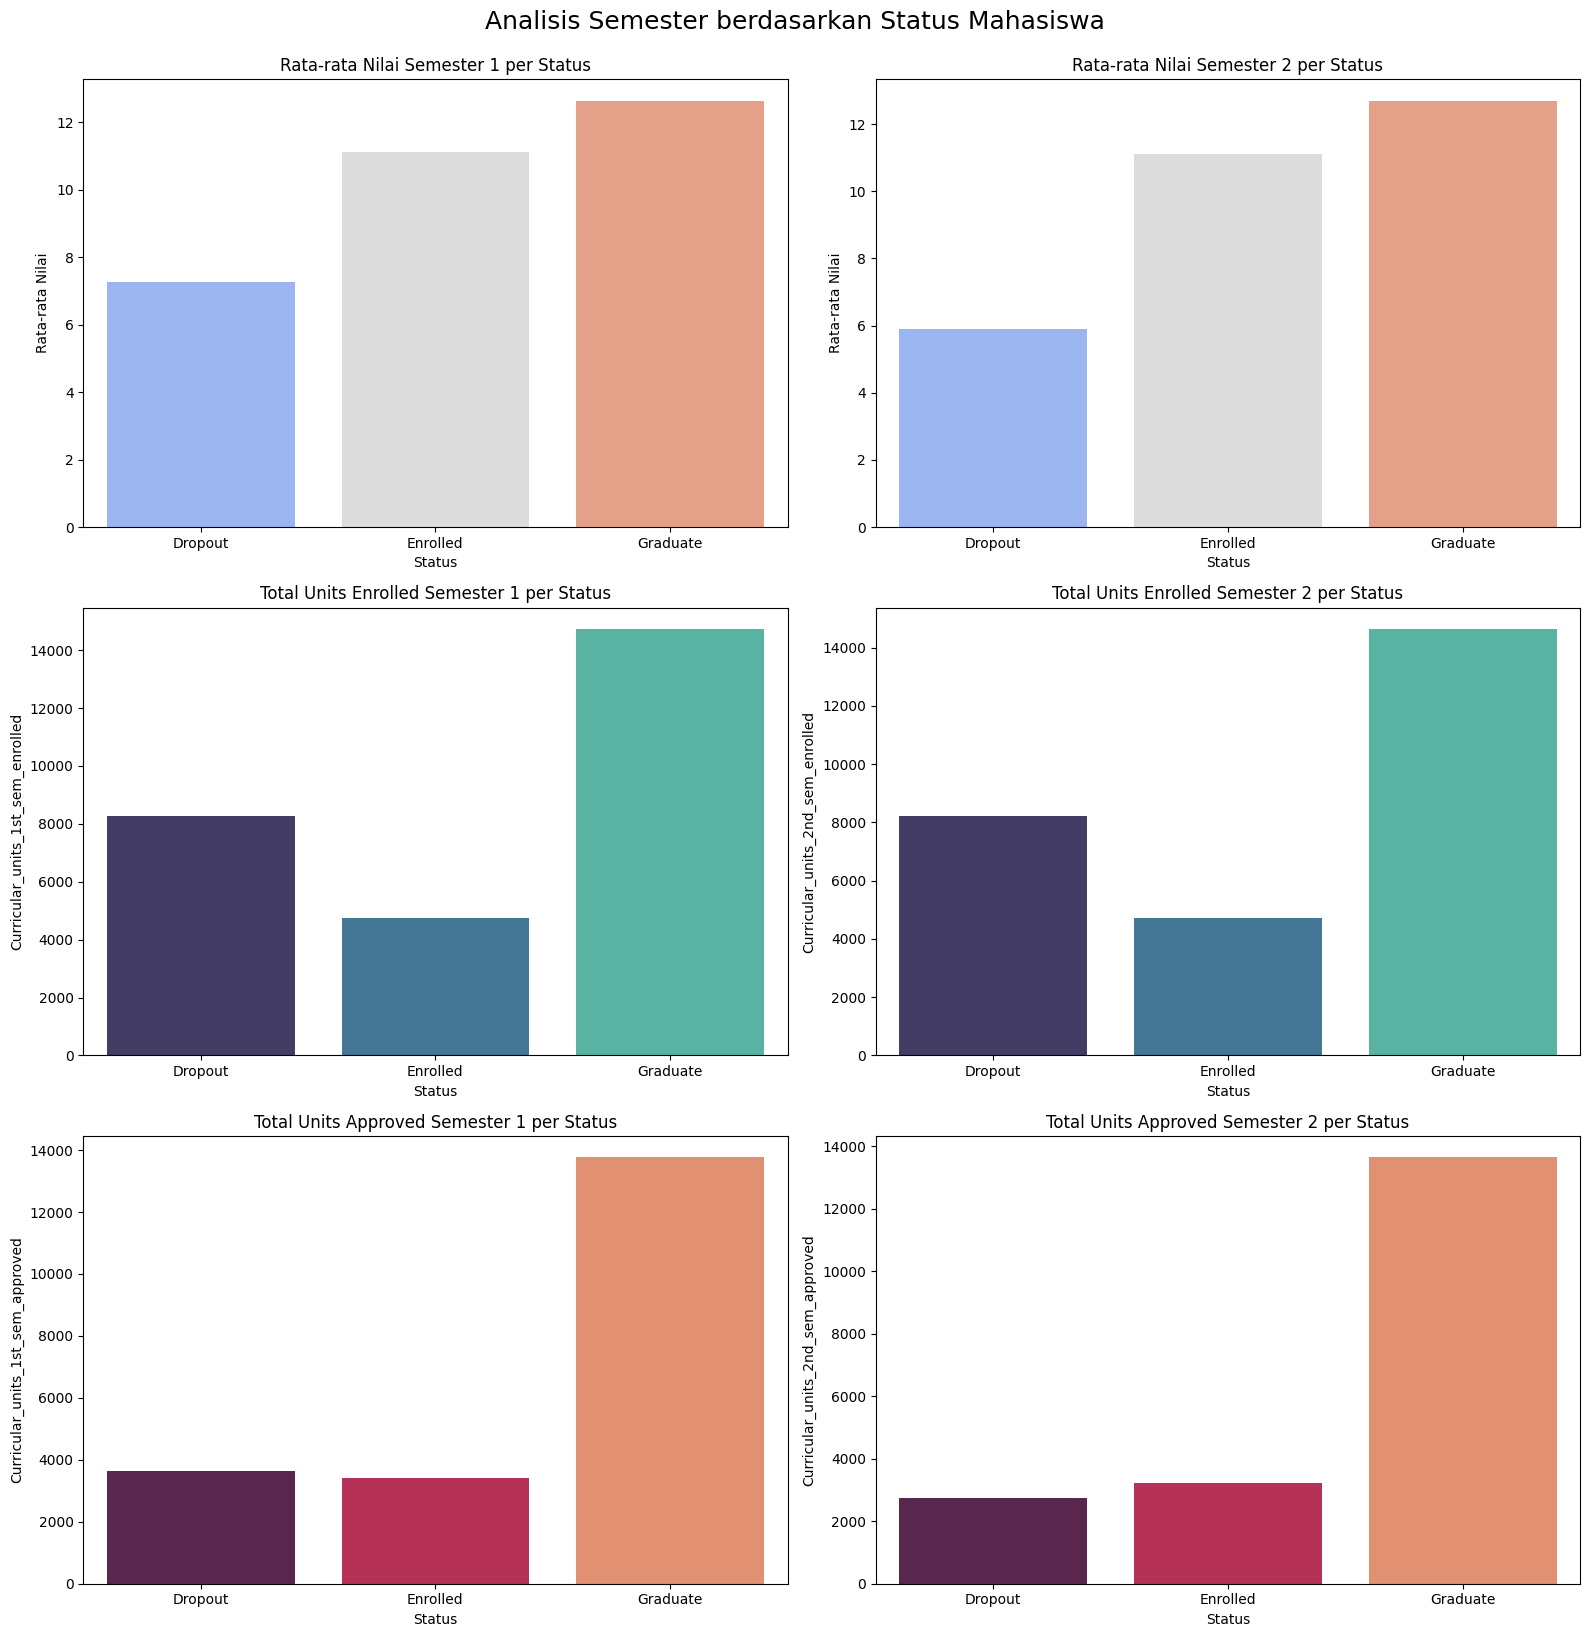

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# Rata-rata nilai semester 1 per Status
avg_sem1 = df_pend.groupby('Status')['Curricular_units_1st_sem_grade'].mean().reset_index()
sns.barplot(ax=axes[0,0], data=avg_sem1, x='Status', y='Curricular_units_1st_sem_grade', palette='coolwarm')
axes[0,0].set_title('Rata-rata Nilai Semester 1 per Status')
axes[0,0].set_ylabel('Rata-rata Nilai')

# Rata-rata nilai semester 2 per Status
avg_sem2 = df_pend.groupby('Status')['Curricular_units_2nd_sem_grade'].mean().reset_index()
sns.barplot(ax=axes[0,1], data=avg_sem2, x='Status', y='Curricular_units_2nd_sem_grade', palette='coolwarm')
axes[0,1].set_title('Rata-rata Nilai Semester 2 per Status')
axes[0,1].set_ylabel('Rata-rata Nilai')

# Total units enrolled semester 1 per Status
sum_enrolled_sem1 = df_pend.groupby('Status')['Curricular_units_1st_sem_enrolled'].sum().reset_index()
sns.barplot(ax=axes[1,0], data=sum_enrolled_sem1, x='Status', y='Curricular_units_1st_sem_enrolled', palette='mako')
axes[1,0].set_title('Total Units Enrolled Semester 1 per Status')

# Total units enrolled semester 2 per Status
sum_enrolled_sem2 = df_pend.groupby('Status')['Curricular_units_2nd_sem_enrolled'].sum().reset_index()
sns.barplot(ax=axes[1,1], data=sum_enrolled_sem2, x='Status', y='Curricular_units_2nd_sem_enrolled', palette='mako')
axes[1,1].set_title('Total Units Enrolled Semester 2 per Status')

# Jumlah units approved semester 1 per Status
sum_approved_sem1 = df_pend.groupby('Status')['Curricular_units_1st_sem_approved'].sum().reset_index()
sns.barplot(ax=axes[2,0], data=sum_approved_sem1, x='Status', y='Curricular_units_1st_sem_approved', palette='rocket')
axes[2,0].set_title('Total Units Approved Semester 1 per Status')

# Jumlah units approved semester 2 per Status
sum_approved_sem2 = df_pend.groupby('Status')['Curricular_units_2nd_sem_approved'].sum().reset_index()
sns.barplot(ax=axes[2,1], data=sum_approved_sem2, x='Status', y='Curricular_units_2nd_sem_approved', palette='rocket')
axes[2,1].set_title('Total Units Approved Semester 2 per Status')

plt.tight_layout()
plt.suptitle('Analisis Semester berdasarkan Status Mahasiswa', fontsize=18, y=1.02)
plt.show()

**Insight**
- Mahasiswa dengan status Graduate menunjukkan rata-rata nilai semester 1 dan 2 yang tertinggi, diikuti oleh mahasiswa Enrolled, dan paling rendah adalah mahasiswa Dropout. Hal ini mengindikasikan bahwa performa akademik yang baik sejak awal perkuliahan berkontribusi besar terhadap kelulusan.
- Dari segi jumlah mata kuliah yang diambil (units enrolled), mahasiswa Graduate juga mengambil unit terbanyak, diikuti oleh Dropout dan Enrolled. Namun, walaupun mahasiswa Dropout mengambil cukup banyak mata kuliah, mereka tetap gagal menyelesaikannya dengan baik, yang terlihat dari jumlah unit yang disetujui (units approved) yang sangat rendah.
- Jumlah unit yang berhasil diselesaikan atau disetujui (approved units) memiliki perbedaan mencolok antara ketiga status. Mahasiswa Graduate menyelesaikan hampir seluruh mata kuliah yang diambil, sementara Dropout dan Enrolled jauh tertinggal. Pola ini menunjukkan bahwa tingkat keberhasilan menyelesaikan mata kuliah merupakan indikator kuat untuk memprediksi kemungkinan mahasiswa akan lulus atau dropout.

## Data Preparation / Preprocessing

In [17]:
# Buat fitur rata-rata dari kolom berpasangan
df_edu['Avg_units_credited'] = df_edu[[
    'Curricular_units_1st_sem_credited',
    'Curricular_units_2nd_sem_credited'
]].mean(axis=1)

df_edu['Avg_units_enrolled'] = df_edu[[
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_2nd_sem_enrolled'
]].mean(axis=1)

df_edu['Avg_units_evaluated'] = df_edu[[
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_2nd_sem_evaluations'
]].mean(axis=1)

df_edu['Avg_units_approved'] = df_edu[[
    'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_approved'
]].mean(axis=1)

df_edu['Avg_units_grade'] = df_edu[[
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade'
]].mean(axis=1)

df_edu['Avg_units_unevaluated'] = df_edu[[
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_without_evaluations'
]].mean(axis=1)

# Drop semua kolom semester-asli (karena udah direpresentasikan oleh rata-rata)
df_edu.drop(columns=[
    'Curricular_units_1st_sem_credited',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_without_evaluations'
], inplace=True)

In [18]:
# Encode target
le_status = LabelEncoder()
df_edu['Status_enc'] = le_status.fit_transform(df_edu['Status'])

In [19]:
df_edu['Status_enc'].value_counts()

,count
Status_enc,
2,2209
0,1421
1,794


In [20]:
# Pisahkan fitur dan target
X = df_edu.drop(columns=['Status', 'Status_enc'])
y = df_edu['Status_enc']

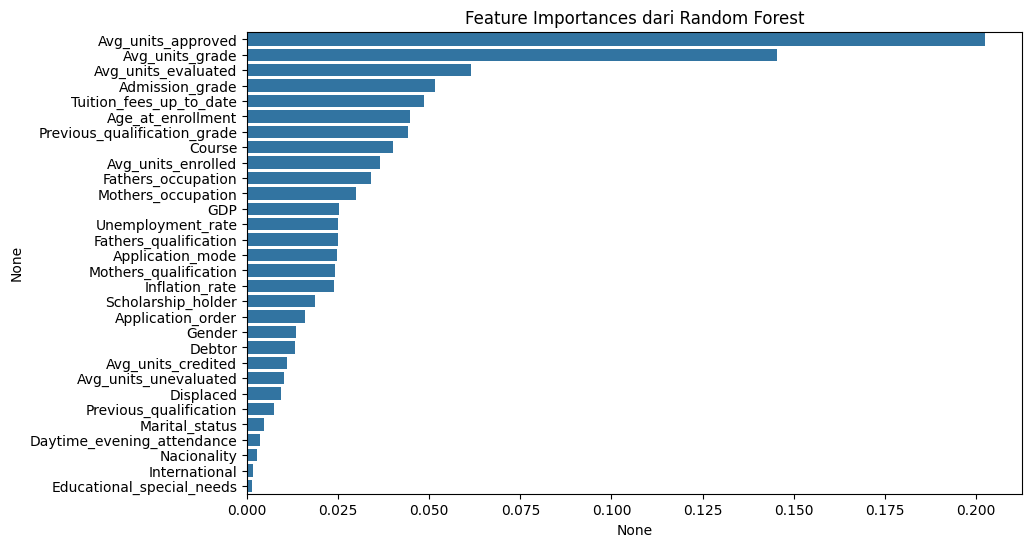

In [21]:
# Feature Selection pakai Random Forest Feature Importance
rf_fs = RandomForestClassifier(random_state=42)
rf_fs.fit(X, y)

importances = rf_fs.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Visualisasi fitur penting
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Feature Importances dari Random Forest')
plt.show()

In [22]:
# Pilih top N fitur terbaik
top_n = 20
selected_features = feat_importances.index[:top_n].tolist()

print("Fitur terpilih:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

Fitur terpilih:
1. Avg_units_approved
2. Avg_units_grade
3. Avg_units_evaluated
4. Admission_grade
5. Tuition_fees_up_to_date
6. Age_at_enrollment
7. Previous_qualification_grade
8. Course
9. Avg_units_enrolled
10. Fathers_occupation
11. Mothers_occupation
12. GDP
13. Unemployment_rate
14. Fathers_qualification
15. Application_mode
16. Mothers_qualification
17. Inflation_rate
18. Scholarship_holder
19. Application_order
20. Gender


In [23]:
# Scaling dengan RobustScaler untuk tangani outlier tanpa menghapus data
scaler = RobustScaler()
X_selected = X[selected_features]
X_scaled = scaler.fit_transform(X_selected)

In [24]:
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE hanya ke data training
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Modeling

Untuk membangun model prediksi status siswa yang optimal, digunakan tiga algoritma pembelajaran mesin: Random Forest, Logistic Regression, dan XGBoost. Masing-masing model ditingkatkan performanya melalui teknik pencarian parameter terbaik menggunakan GridSearchCV dengan validasi silang sebanyak tiga lipatan (3-fold cross-validation).
- Random Forest disesuaikan dengan variasi pada jumlah pohon (n_estimators), kedalaman maksimum (max_depth), dan jumlah minimum sampel untuk split internal (min_samples_split).
- Logistic Regression dioptimalkan melalui parameter regulasi (C) dan jenis solver yang digunakan.
-  XGBoost diatur dengan kombinasi parameter seperti jumlah estimator, kedalaman pohon, learning rate, dan subsample.

Proses tuning ini bertujuan untuk memperoleh kombinasi parameter yang memberikan akurasi terbaik pada data pelatihan.

In [25]:
# Random Forest
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_
print("Best Parameters (Random Forest):", grid_rf.best_params_)

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [26]:
# Logistik Regresion
param_lr = {
    'C': [0.1, 1.0, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=500), param_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)
lr_best = grid_lr.best_estimator_
print("Best Parameters (Logistic Regression):", grid_lr.best_params_)

Best Parameters (Logistic Regression): {'C': 1.0, 'solver': 'lbfgs'}


In [27]:
# XGBoost
param_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                        param_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
xgb_best = grid_xgb.best_estimator_
print("Best Parameters (XGBoost):", grid_xgb.best_params_)

Best Parameters (XGBoost): {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


## Evaluation

In [28]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Evaluasi Random Forest
Accuracy: 0.7661
Precision: 0.7516
Recall: 0.7661
F1-score: 0.7470

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       284
           1       0.60      0.32      0.42       159
           2       0.78      0.94      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



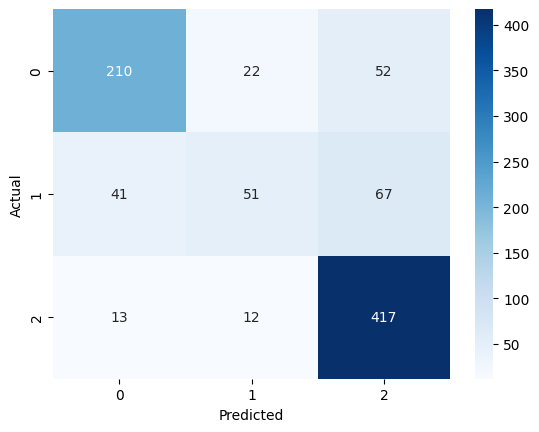

In [29]:
print("Evaluasi Random Forest")
evaluate_model(rf_best, X_test, y_test)

Evaluasi Logistic Regression
Accuracy: 0.7638
Precision: 0.7459
Recall: 0.7638
F1-score: 0.7481

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       284
           1       0.52      0.33      0.41       159
           2       0.80      0.93      0.86       442

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



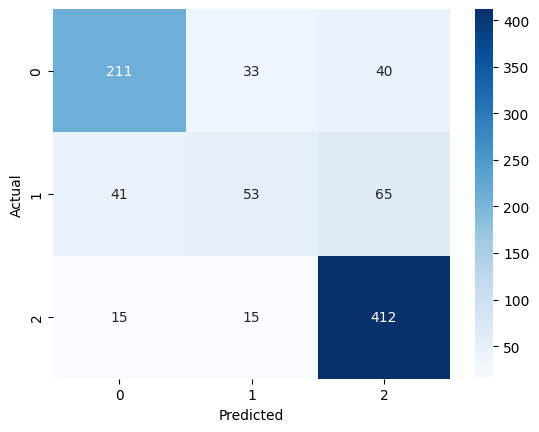

In [30]:
print("Evaluasi Logistic Regression")
evaluate_model(lr_best, X_test, y_test)

Evaluasi XGBoost
Accuracy: 0.7638
Precision: 0.7537
Recall: 0.7638
F1-score: 0.7553

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       284
           1       0.50      0.41      0.45       159
           2       0.81      0.92      0.86       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.76       885



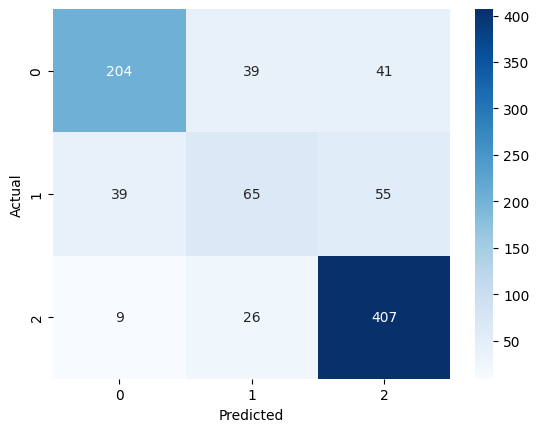

In [31]:
print("Evaluasi XGBoost")
evaluate_model(xgb_best, X_test, y_test)

**Kesimpulan Evaluasi Model**

Tiga model pembelajaran mesin telah dievaluasi untuk memprediksi status siswa, yaitu **Random Forest**, **Logistic Regression**, dan **XGBoost**. Hasil evaluasi menunjukkan bahwa ketiganya memiliki performa yang cukup kompetitif, dengan nilai akurasi berkisar antara 76% hingga 77%.

* **Random Forest** memberikan akurasi tertinggi sebesar **0.7661**, dengan f1-score keseluruhan sebesar **0.7470**. Model ini menunjukkan performa yang baik terutama pada kelas mayoritas (kelas 2), namun masih memiliki kekurangan dalam mengenali kelas minoritas (kelas 1).

* **Logistic Regression** menghasilkan akurasi sebesar **0.7638**, dengan f1-score **0.7481**. Meskipun model ini sedikit lebih rendah akurasinya dibanding Random Forest, namun cukup seimbang dalam hal presisi dan recall.

* **XGBoost** juga menunjukkan akurasi sebesar **0.7638**, dengan f1-score tertinggi di antara ketiganya, yaitu **0.7553**. XGBoost lebih unggul dalam mendeteksi kelas mayoritas dan memperlihatkan keseimbangan metrik yang baik secara keseluruhan.

Berdasarkan hasil tersebut, ketiga model memiliki performa yang layak untuk digunakan dalam prediksi. Namun, **XGBoost dipertimbangkan sebagai kandidat model terbaik** karena memberikan nilai f1-score tertinggi secara keseluruhan.

Model terbaik yang telah diperoleh akan disimpan dan digunakan untuk proses prediksi status siswa pada data baru.


### Simpan Model Terbaik

In [32]:
os. makedirs('model', exist_ok=True)
joblib.dump(xgb_best, 'model/model_xgb.pkl')
joblib.dump(scaler, 'model/robust_scaler.pkl')
joblib.dump(le_status, 'model/label_encoder.pkl')

feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "model/feature_names.pkl")

['model/feature_names.pkl']